# Flower Species Classification basesd on Iris Dataset 
Model Selection and EDA

By: Suryash Chakravarty, Hooman Esteki, Bright Arafat Bello

Github URL: https://github.com/hoomanesteki/iris-ml-predictor

## Libraries

In [2]:
import pandas as pd
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

## Summary

In this analysis we developed a classification model by utilizing the famous Iris dataset. The features of the iris flowers: sepal length, sepal width, petal length, and petal width were the basis on which a Decision Tree Classifier was used for prediction. In order to check its performance, the model was first trained on one part of the dataset and then validated on another part (test set).

The outcome of our model was quite impressive, as it reached a very high accuracy (87%) on the test set.

The significance of this analysis is mainly associated with the Iris dataset which is considered to be one of the best datasets for introducing basic supervised learning concepts. It is easy but meaningful to see how numerical features can be used to separate different classes.

On the other hand, one can’t ignore the limitations of this work as well. The size of the dataset (150 samples) is relatively small which could affect the generalization of our results over the whole population. Furthermore, only one model (DecisionTreeClassifier) was evaluated with very slight tuning; hence, if cross-validated model selection or advanced algorithms were used, better performance might be attained.

## Introduction

For this analysis, the Iris dataset was chosen, a well-known dataset in both machine learning and statistics. Iris flowers are the subjects of the dataset, which contains 150 samples. Each flower is represented by four attributes: sepal length, sepal width, petal length, and petal width. The species of the iris flower is the target variable, which can be one of three species: Iris setosa, Iris versicolor, or Iris virginica.

The columns of the dataset are:

`sepal length`, `sepal width`, `petal length`, `petal width`, `class`


The main task of the present analysis is to create a classification model that predicts the species of an iris flower solely based on its features with high accuracy. A DecisionTreeClassifier model will be applied to make this prediction and we will give a summary of the results obtained from this model, including its accuracy on the test data.

Revealing the relationships among the features in this dataset has a bearing on the data characteristics since the Iris dataset is widely used to show the basic ideas of classification tasks. Furthermore, it helps to visualize how the differences in feature distributions influence the model's discriminative power between classes.

Additionally, the small dataset size and the overlapping feature distributions, particularly between the classes versicolor and virginica, limit the model's performance. Consequently, these limitations should be taken into account when interpreting the results.

## Methods and Results

First, let's load our data to a variable called `iris`.

In [4]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 

In [5]:
iris = iris.data.original
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Do we have any null values? Let's check.

In [6]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
len(iris)

150

150 non null values in each column, and a total of 150 rows. Therefore, no null values exist. Good.

Let's check the distribution of each class in the dataset.

In [9]:
iris['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Each class has exactly 50 instances.

Before doing any more EDA, lets split our data into train and test.

In [9]:
iris_train, iris_test = train_test_split(iris, test_size=0.2, random_state=522)
iris_train.head()

,sepal length,sepal width,petal length,petal width,class
51,6.4,3.2,4.5,1.5,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
43,5.0,3.5,1.6,0.6,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica


Lets see what the spread looks like for each class

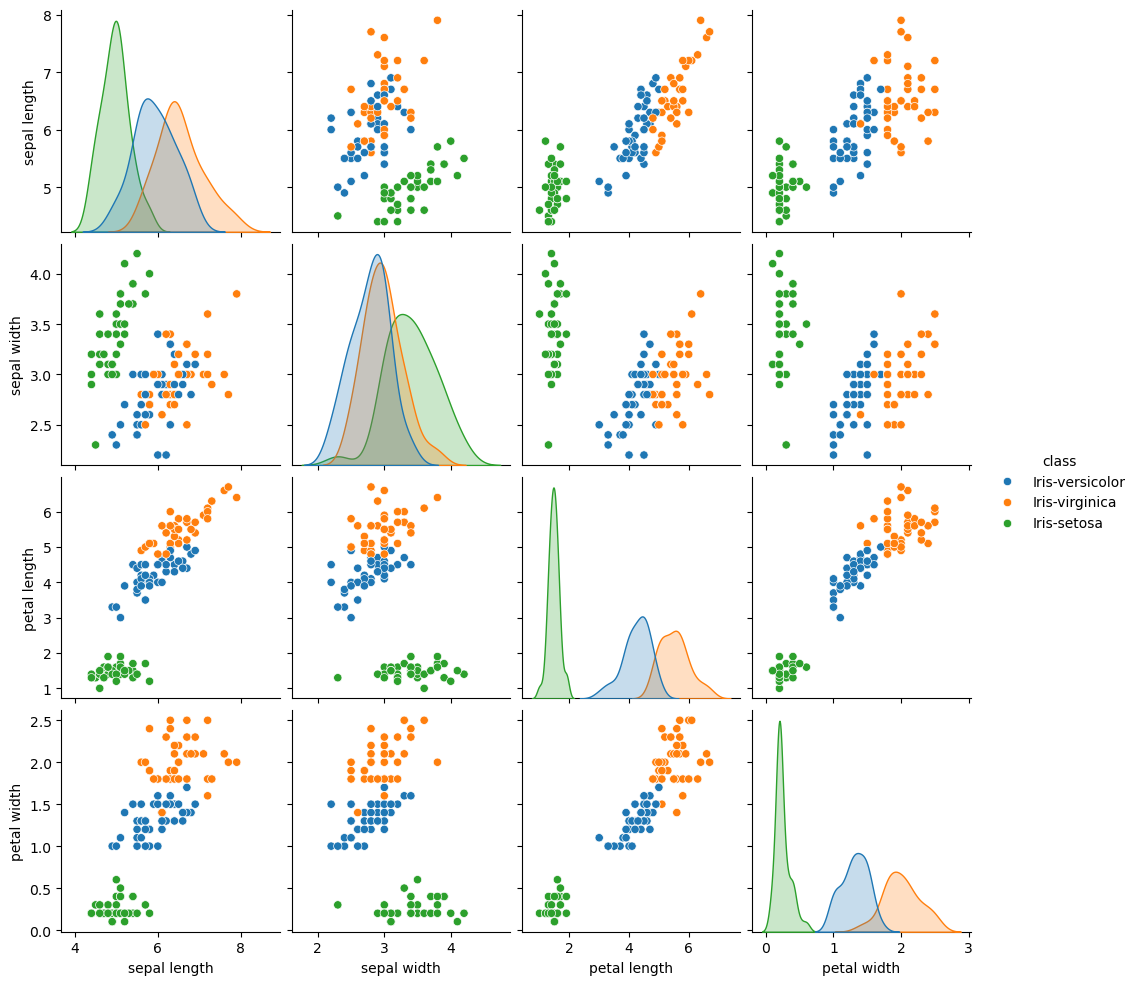

In [10]:
plt = sns.pairplot(iris_train, hue='class')
plt

###### Code partially referenced from DSCI 571.

From the pairwise comparison chart above, we can see that `setosa` has the smallest petal width and length while `virginica` has the largest.

Is there a correlation between our features? Lets see.

<Axes: >

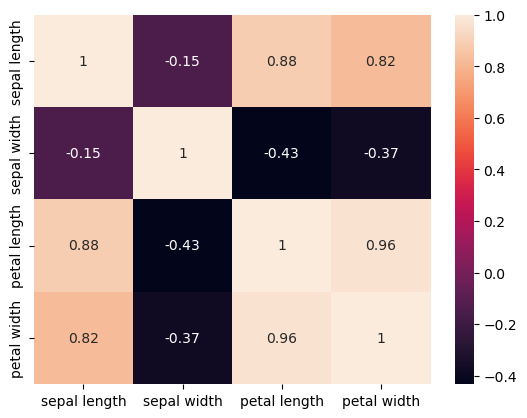

In [11]:
plt_corr = sns.heatmap(iris_train.drop(columns =['class'], axis=1).corr(), annot=True)
plt_corr

We see a strong correaltion between petal length and sepal length. As well, there is a strong correlation between `PetalWidthCm` and `PetalLengthCm`. This implies that the wider a petal is, the longer it also could be.

Lets see what the distribution of Petal Length looks like for each of our species

Text(0.5, 1.0, 'Distribution of Petal Width by Flower Species')

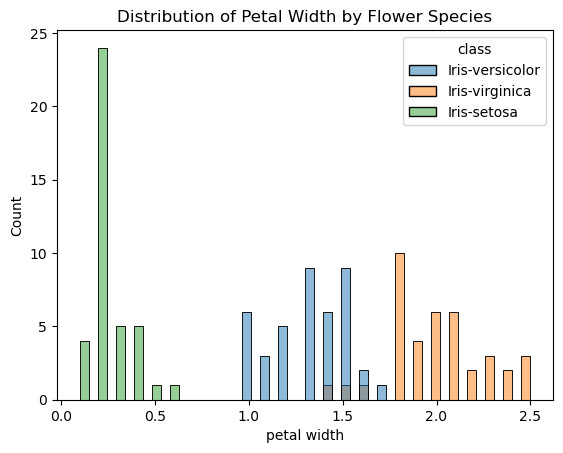

In [12]:
sns.histplot(
    data=iris_train, 
    x='petal width', 
    hue='class', 
    bins=50, 
    alpha=0.5,
    multiple='layer'

).set_title('Distribution of Petal Width by Flower Species')

From the chart above, we can see that `Setosa` flower has the smallest petal size while `Virginica` is the largest. 

Text(0.5, 1.0, 'Distribution of Petal Width by Flower Species')

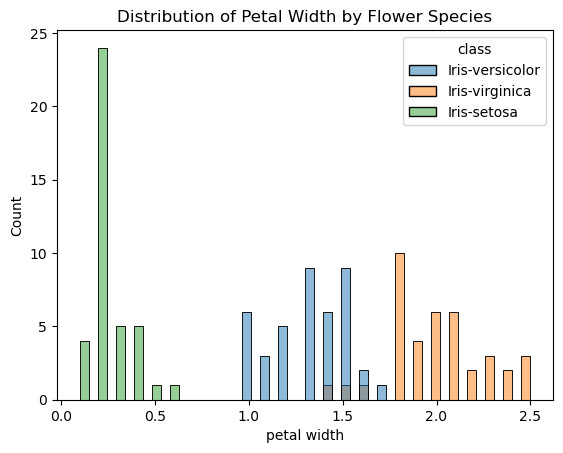

In [16]:
sns.histplot(
    data=iris_train,
    x='petal width',
    hue='class',
    bins=50,
    alpha=0.5,
    multiple='layer'
).set_title('Distribution of Petal Width by Flower Species')

From the chart above, we can see that `Setosa` flower has the smallest petal size while `Virginica` is the largest.









Lets fit a classification model to our data.

Lets first isolate our variables into X_train, X_test, y_train, and y_test. We also need to convert our classification variable to numeric instead of character.

In [13]:
X_train, X_test = iris_train.drop(columns=['class']), iris_test.drop(columns=['class'])
y_train, y_test = iris_train[['class']], iris_test[['class']]

y_train['class']=y_train['class'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})
y_test['class']=y_test['class'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})

y_test.head()

C:\Users\surya\AppData\Local\Temp\ipykernel_8792\3253766961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['class']=y_train['class'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})
C:\Users\surya\AppData\Local\Temp\ipykernel_8792\3253766961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['class']=y_test['class'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})


,class
86,1
135,2
119,2
118,2
127,2


Lets start with a `DummyClassifier` object.

In [14]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [15]:
dummy.score(X_test, y_test)

0.3

The dummy classifier achieves an accuracy of 0.33 on the test set, which is expected since it randomly predicts one of the three classes.

Now we fit a Decision Tree Classifier to our data.

In [16]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
tree.score(X_test, y_test)

0.8666666666666667

We see that the decision tree classifier achieves an accuracy of approximately `87%` on the test set, which is a significant improvement over the dummy classifier. This indicates that the decision tree model is able to effectively capture patterns in the data to make accurate predictions about the species of iris flowers based on their features.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      0.78      0.78         9
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



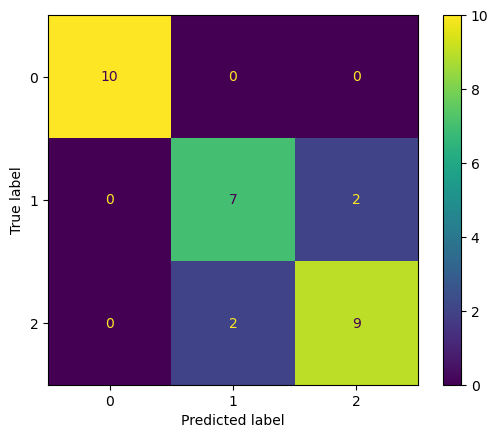

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()

## Discussion

We observe that the model predicts `Iris setosa` perfectly, while there are some misclassifications between `Iris versicolor` and `Iris virginica`. This is likely due to the fact that these two species have more similar feature values compared to `Iris setosa`, which is distinctly different in terms of petal length and width.

This model will be able to accurately predict the species of iris flowers based on their features with a high degree of accuracy. Further improvements could be made by tuning the hyperparameters of the decision tree or exploring other classification algorithms.

Future work could include testing this model on different flower species datasets to evaluate its generalizability and robustness.
Future improvements could also involve exploring other models, such as Random Forests or logistic regression, to potentially enhance predictive performance.


## References

1. UCI Machine Learning Repository: Iris Data Set. https://archive.ics.uci.edu/ml/datasets/iris
2. Milestone 1 of DSCI 522.
3. Scikit-learn documentation: https://scikit-learn.org/stable/
4. Seaborn documentation: https://seaborn.pydata.org/
5. DSCI 571 course materials.